In [2]:
# !pip install missing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from tqdm.notebook import tqdm

# Creating the data
- Same dataset that Etienne created last tutorial
- We just have more datapoints, and a smaller domain

In [4]:
N_data = 50000

data_x = np.linspace(1.0, 20.0, N_data)[:, np.newaxis]
data_y = 0.02*data_x + 0.3*np.sin(data_x) + 1e-1  * np.log( data_x ) **2 + 0.2*np.random.randn(N_data,1)

data_x.shape, data_y.shape

((50000, 1), (50000, 1))

Text(0, 0.5, 'temperature')

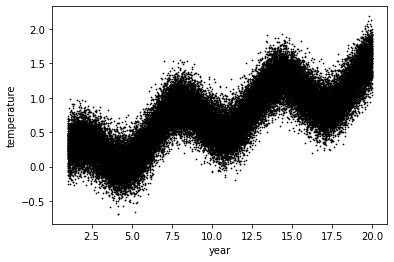

In [5]:
plt.scatter( data_x.flatten(), data_y.flatten(), s=0.5, color='black')
plt.xlabel('year')
plt.ylabel('temperature')

#### Splitting into train and test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = X_train.astype(np.float32), X_test.astype(np.float32), y_train.astype(np.float32), y_test.astype(np.float32)

X_train.shape, y_train.shape

((40000, 1), (40000, 1))

# Let's try to fit the data using torch this time -

# Creating the dataset

![Alt text](raw_data_to_dataset.png)

In [7]:
class TempDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return len(self.x)

In [8]:
train_ds = TempDataset(X_train, y_train)
test_ds = TempDataset(X_test, y_test)

# Creating the dataloader

![Alt text](dataloader.png)

In [9]:
train_dl = DataLoader(train_ds, batch_size=250, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=5000, shuffle=False)

# Crearting the network

In [10]:
class TempNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(1,1,bias=True)
    def forward(self, x):
        out = self.layer(x)
        return out

In [11]:
model = TempNN()

# Training loop

In [12]:
losses = []
epochs = 50
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for ep in tqdm(range(epochs)):
    for xb, yb in train_dl:
        optimizer.zero_grad()
        pred = model(xb)
        loss = nn.MSELoss()(pred, yb)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())



  0%|          | 0/50 [00:00<?, ?it/s]

Text(0, 0.5, 'loss')

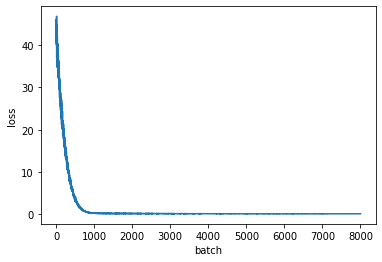

In [13]:
plt.plot(losses)
plt.xlabel('batch')
plt.ylabel('loss')

# Inference

In [14]:
Y_test_pred = model(torch.from_numpy(X_test)).detach().numpy()

Text(0, 0.5, 'temperature')

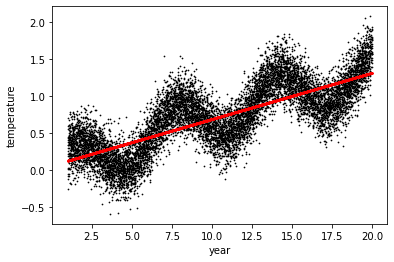

In [15]:
plt.scatter(X_test.flatten(), y_test.flatten(), s=0.5, color='black')
plt.scatter(X_test.flatten(), Y_test_pred.flatten(), s=0.5, color='red')
plt.xlabel('year')
plt.ylabel('temperature')

# _Pure_ ML code
**_Just a few lines of code :)_**

In [27]:
# create the dataseets
class TempDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return len(self.x)
    
train_ds = TempDataset(X_train, y_train)
test_ds = TempDataset(X_test, y_test)

# create the dataloaders
train_dl = DataLoader(train_ds, batch_size=250, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=5000, shuffle=False)

# the model
class TempNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(1,1,bias=True)
    def forward(self, x):
        out = self.layer(x)
        return out

model = TempNN()

# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# training loop
for ep in tqdm(range(20)):
    for xb, yb in train_dl:
        optimizer.zero_grad()
        pred = model(xb)
        loss = nn.MSELoss()(pred, yb)
        loss.backward()
        optimizer.step()


  0%|          | 0/20 [00:00<?, ?it/s]